## Introduction to Clustering - Unsupervised Learnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

## Generate some random points

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.60)

In [5]:
all_points = pd.concat( [pd.DataFrame( X ),  pd.DataFrame( y ) ] , axis = 1 )

In [6]:
all_points.columns = ["x1", "x2", "y"]

In [7]:
all_points.head()

,x1,x2,y
0,0.428577,4.973997,0
1,1.619909,0.067645,1
2,1.432893,4.376792,0
3,-1.578462,3.034458,2
4,-1.658629,2.267460,2


## Draw the points on a graph and find out how they are scattered

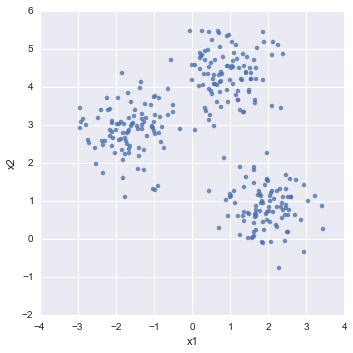

In [8]:
sn.lmplot( "x1", "x2", data=all_points, fit_reg=False, size = 5 )

## Can a clustering algorithm group them together by how nearer they are to each other

## Using K-means clustering technique

In [9]:
from sklearn.cluster import KMeans

In [10]:
X = all_points[["x1", "x2"]]
clusters = KMeans(3)  # 3 clusters
clusters.fit( X )

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [11]:
clusters.cluster_centers_

array([[ 0.95625704,  4.37226546],
       [ 1.95159369,  0.83467497],
       [-1.60811992,  2.85881658]])

In [ ]:
clusters.labels_

In [13]:
all_points["clusterid_1"] = clusters.labels_

In [14]:
all_points.head()

,x1,x2,y,clusterid_1
0,0.428577,4.973997,0,0
1,1.619909,0.067645,1,1
2,1.432893,4.376792,0,0
3,-1.578462,3.034458,2,2
4,-1.658629,2.267460,2,2


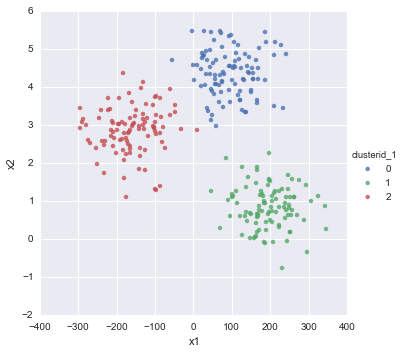

In [39]:
sn.lmplot( "x1", "x2", data=all_points, hue = "clusterid_1", fit_reg=False, size = 5 )

## How well the points were clustered

In [16]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(all_points.y, all_points.clusterid_1)

1.0

## Does the scale of dimensions impact the clustering?

In [17]:
all_points["x1"] = all_points.x1 * 100

In [18]:
all_points.head()

,x1,x2,y,clusterid_1
0,42.857674,4.973997,0,0
1,161.990909,0.067645,1,1
2,143.289271,4.376792,0,0
3,-157.846247,3.034458,2,2
4,-165.862863,2.267460,2,2


In [19]:
X = all_points[["x1", "x2"]]
clusters = KMeans(3)  # 3 clusters
clusters.fit( X )

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

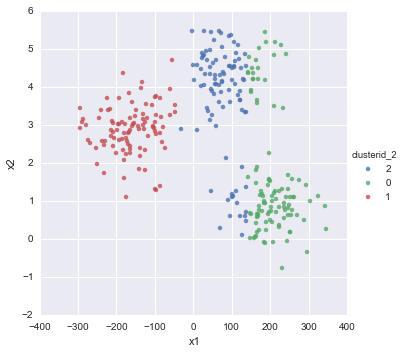

In [21]:
all_points["clusterid_2"] = clusters.labels_
sn.lmplot( "x1", "x2", data=all_points, hue = "clusterid_2", fit_reg=False, size = 5 )

## Scale the dimensions to remove the impact

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

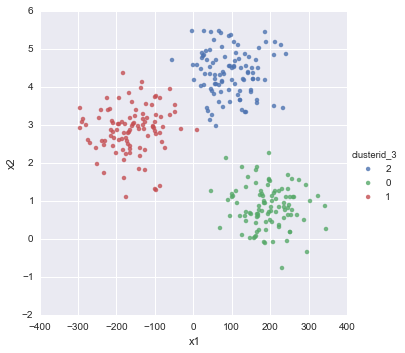

In [24]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )
all_points["clusterid_3"] = clusters.labels_
sn.lmplot( "x1", "x2", data=all_points, hue = "clusterid_3", fit_reg=False, size = 5 )

## Can K-means work if the clusters are not well segregated.. what if the clustered are interspersed

In [25]:
from sklearn import datasets
moon_points = datasets.make_moons(n_samples=1000, noise=.05)

In [26]:
X, y = enumerate( moon_points )

In [27]:
moon_points = pd.DataFrame( X[1] )

In [28]:
moon_points.columns = ["x1", "x2"] 

In [29]:
moon_points["y"] = y[1]

In [30]:
moon_points.head()

,x1,x2,y
0,0.236505,-0.250802,1
1,1.033314,0.054583,0
2,0.197299,-0.199468,1
3,1.014712,0.444184,0
4,1.029678,-0.525868,1


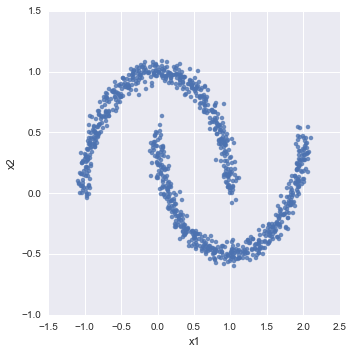

In [31]:
sn.lmplot( "x1", "x2", data=moon_points, fit_reg=False, size = 5 )

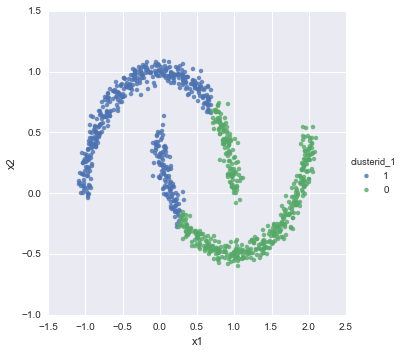

In [32]:
moon_clusters = KMeans(2)  # 3 clusters
moon_clusters.fit( moon_points[["x1", "x2"]] )
moon_points["clusterid_1"] = moon_clusters.labels_
sn.lmplot( "x1", "x2", data=moon_points, hue = "clusterid_1", fit_reg=False, size = 5 )

## Using DBSCAN for density based clutering

In [34]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.2)

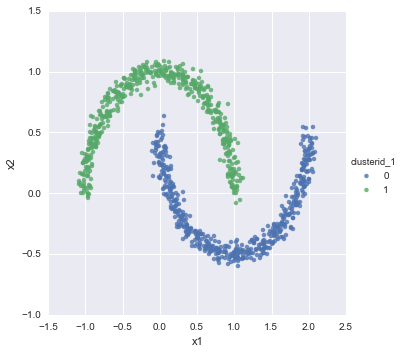

In [35]:
moon_clusters = DBSCAN( eps=.2 )  
moon_clusters.fit( moon_points[["x1", "x2"]] )
moon_points["clusterid_1"] = moon_clusters.labels_
sn.lmplot( "x1", "x2", data=moon_points, hue = "clusterid_1", fit_reg=False, size = 5 )

## Using DBSCAN for points in circles..

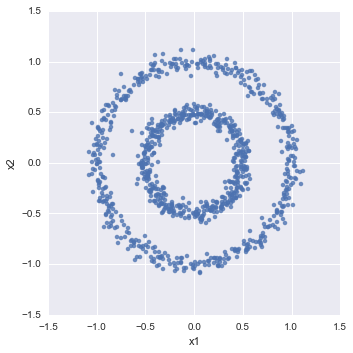

In [36]:
circle_points = datasets.make_circles(n_samples=1000, factor=.5,
                                      noise=.05)
X, y = enumerate( circle_points )
circle_points = pd.DataFrame( X[1] )
circle_points.columns = ["x1", "x2"] 
circle_points["y"] = y[1]
circle_points.head()
sn.lmplot( "x1", "x2", data=circle_points, fit_reg=False, size = 5 )

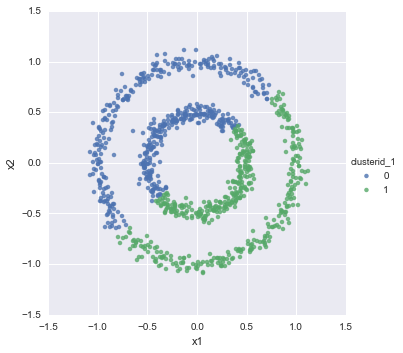

In [37]:
circle_clusters = KMeans(2)  # 3 clusters
circle_clusters.fit( circle_points[["x1", "x2"]] )
circle_points["clusterid_1"] = circle_clusters.labels_
sn.lmplot( "x1", "x2", data=circle_points, hue = "clusterid_1", fit_reg=False, size = 5 )

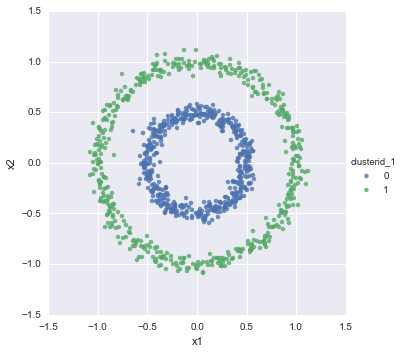

In [38]:
circle_clusters = DBSCAN( eps=.2 )  
circle_clusters.fit( circle_points[["x1", "x2"]] )
circle_points["clusterid_1"] = circle_clusters.labels_
sn.lmplot( "x1", "x2", data=circle_points, hue = "clusterid_1", fit_reg=False, size = 5 )